In [1]:
%load_ext autoreload
%autoreload 2

import train
import evaluate

In [2]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=200,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=200,
    max_norm=3,
)

word_results, char_results = evaluate.run(
    params,
    char_params,
    training_sizes=[200, 800, 1600, 2400],
    window_sizes=[(0, 0)],
    k=10,
    kmeans_path="../clustered_data/15",
    num_clusters=15,
    num_clusters_gmm=18,
    use_cluster_cnn=False,
)

Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

200 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.77it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

800 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

1600 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

2400 training samples, 1132 testing samples


100%|██████████| 10/10 [28:33<00:00, 172.98s/it]


In [3]:
df = evaluate.results_to_dataframe(word_results, char_results)

In [4]:
%store -r
#%store df

Stored 'df' (DataFrame)


                                  score                    
                                   mean       std         p
size model    method   window                              
200  TokenCNN Baseline 0       0.837537  0.010427       NaN
              K-Means  0       0.838342  0.015019  0.881944
              GMM      0       0.848219  0.014004  0.061634
     CharCNN  Baseline 0       0.846187  0.016582       NaN
              K-Means  0       0.860748  0.015477  0.063488
              GMM      0       0.851867  0.020402  0.551623
800  TokenCNN Baseline 0       0.845318  0.008970       NaN
              K-Means  0       0.851760  0.007169  0.110001
              GMM      0       0.856441  0.009198  0.011040
     CharCNN  Baseline 0       0.867475  0.010628       NaN
              K-Means  0       0.857058  0.018007  0.183395
              GMM      0       0.870089  0.011106  0.586658
1600 TokenCNN Baseline 0       0.848631  0.009891       NaN
              K-Means  0       0.860020 

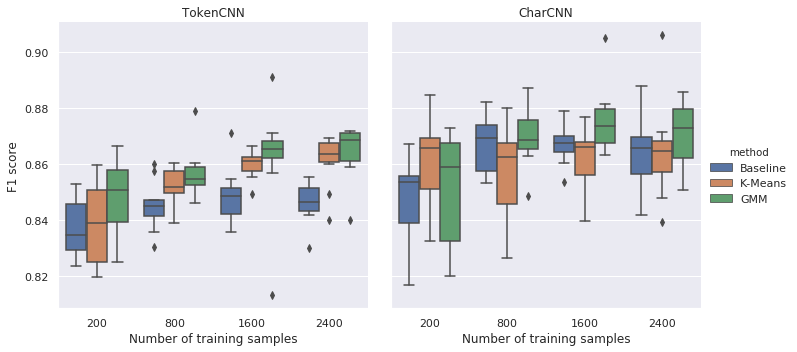

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

def p(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    return ttest_rel(baseline_scores, scores)[1]

evaluate.plot_sns(df)
print(df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]))

dir = "concat_window0"
os.makedirs(dir, exist_ok=True)
os.chdir(dir)

try:
    plt.savefig("plot.pdf")
    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_latex("table.tex")
    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_csv("table.csv")
except e:
    print(e)
finally:
    os.chdir("..")